In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.6.0'

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# 1. MNIST Data_Set Load & Review

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [6]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


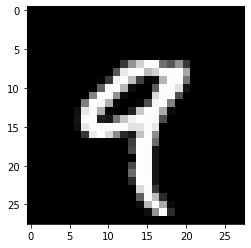

In [7]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [8]:
import numpy as np

np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [9]:
# 2. Data Preprocessing

# reshape -> (60000, 28, 28) to (60000, 784)

X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
# Normalization

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [11]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
# 3. MNIST Keras Modeling

from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [15]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [17]:
%%time 

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.2525 - accuracy: 0.9235 - val_loss: 0.1476 - val_accuracy: 0.9542
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0918 - accuracy: 0.9718 - val_loss: 0.0939 - val_accuracy: 0.9717
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.0911 - val_accuracy: 0.9713
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.1051 - val_accuracy: 0.9724
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0989 - val_accuracy: 0.9753
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0918 - val_accuracy: 0.9797
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.1123 - val_accuracy: 0.9779

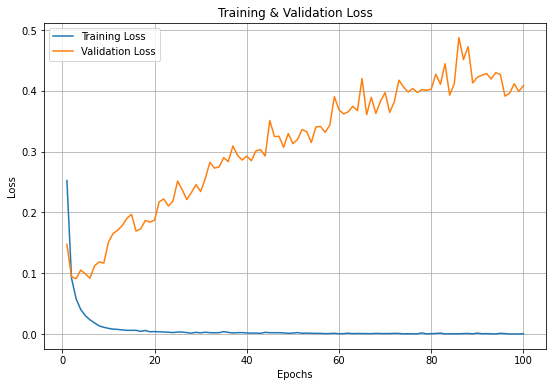

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [19]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.9825
Loss = 0.33806
Accuracy = 0.98250


In [20]:
np.set_printoptions(suppress=True, precision=9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [21]:
print(np.argmax(mnist.predict(X_test[:1,:])))

7


In [21]:
# Overfitting Issues solutions

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3252 - accuracy: 0.9078 - val_loss: 0.1796 - val_accuracy: 0.9474
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1461 - accuracy: 0.9580 - val_loss: 0.1203 - val_accuracy: 0.9643
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0985 - accuracy: 0.9716 - val_loss: 0.1038 - val_accuracy: 0.9692
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0742 - accuracy: 0.9794 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9832 - val_loss: 0.0873 - val_accuracy: 0.9743
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0459 - accuracy: 0.9870 - val_loss: 0.0826 - val_accuracy: 0.9747
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0371 - accuracy: 0.9893 - val_loss: 0.0942 - val_accuracy: 0.9732

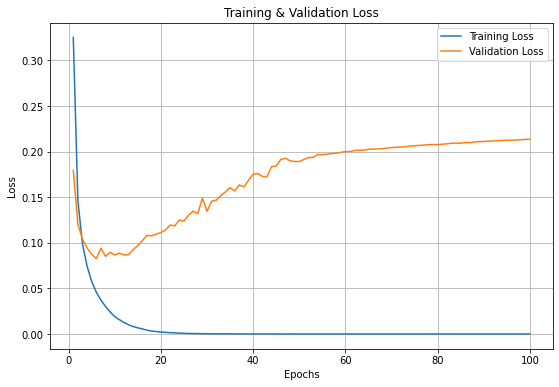

313/313 [==============================] - 1s 3ms/step - loss: 0.1787 - accuracy: 0.9813
Loss = 0.17869
Accuracy = 0.98130


In [26]:
# 1. Model Capacity

######## 변경부분 ########

mnist = models.Sequential()
# mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

######## 변경부분 ########

# compile
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# fitting

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

# visualization

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# result check
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.2627 - accuracy: 0.9222 - val_loss: 0.1420 - val_accuracy: 0.9598
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1029 - accuracy: 0.9716 - val_loss: 0.1053 - val_accuracy: 0.9713
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0717 - accuracy: 0.9814 - val_loss: 0.0936 - val_accuracy: 0.9768
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0530 - accuracy: 0.9865 - val_loss: 0.1226 - val_accuracy: 0.9693
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0460 - accuracy: 0.9886 - val_loss: 0.0999 - val_accuracy: 0.9769
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0369 - accuracy: 0.9919 - val_loss: 0.1100 - val_accuracy: 0.9764
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0336 - accuracy: 0.9922 - val_loss: 0.1019 - val_accuracy: 0.9784

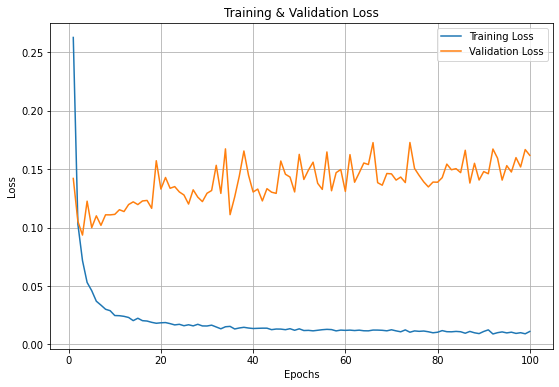

313/313 [==============================] - 1s 3ms/step - loss: 0.1406 - accuracy: 0.9805
Loss = 0.14063
Accuracy = 0.98050


In [28]:
# 2. L2 Regularization

######## 변경부분 ########

from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.Dense(10, activation = 'softmax'))

######## 변경부분 ########

# compile
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# fitting

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

# visualization

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# result check
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.3227 - accuracy: 0.9003 - val_loss: 0.1210 - val_accuracy: 0.9627
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1439 - accuracy: 0.9569 - val_loss: 0.1004 - val_accuracy: 0.9707
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1085 - accuracy: 0.9666 - val_loss: 0.0993 - val_accuracy: 0.9700
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0915 - accuracy: 0.9729 - val_loss: 0.0848 - val_accuracy: 0.9763
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0791 - accuracy: 0.9766 - val_loss: 0.0874 - val_accuracy: 0.9768
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0702 - accuracy: 0.9796 - val_loss: 0.0838 - val_accuracy: 0.9778
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0629 - accuracy: 0.9814 - val_loss: 0.0830 - val_accuracy: 0.9780

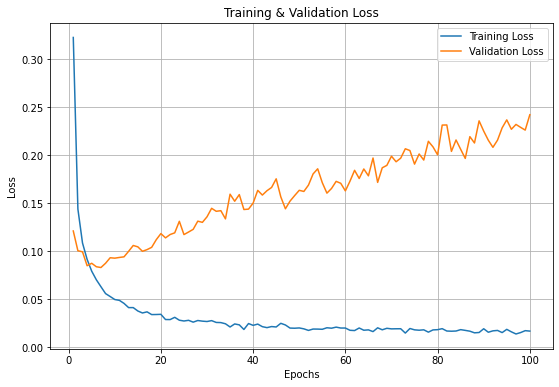

313/313 [==============================] - 1s 3ms/step - loss: 0.2161 - accuracy: 0.9839
Loss = 0.21609
Accuracy = 0.98390


In [29]:
# 3. Dropout

######## 변경부분 ########

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation = 'softmax'))

######## 변경부분 ########

# compile
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# fitting

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

# visualization

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# result check
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 0.1774 - accuracy: 0.9471 - val_loss: 0.1382 - val_accuracy: 0.9573
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0728 - accuracy: 0.9774 - val_loss: 0.0958 - val_accuracy: 0.9713
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0851 - val_accuracy: 0.9757
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0988 - val_accuracy: 0.9743
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0913 - val_accuracy: 0.9800
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0802 - val_accuracy: 0.9796

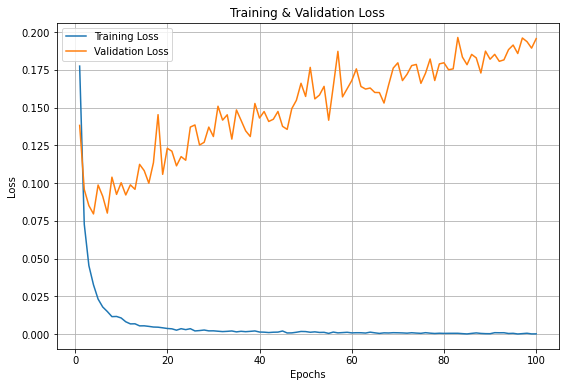

313/313 [==============================] - 1s 3ms/step - loss: 0.1627 - accuracy: 0.9826
Loss = 0.16266
Accuracy = 0.98260


In [30]:
# 4. Batch Normalization

######## 변경부분 ########

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

######## 변경부분 ########

# compile
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# fitting

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

# visualization

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# result check
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.3327 - accuracy: 0.9003 - val_loss: 0.1345 - val_accuracy: 0.9615
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1560 - accuracy: 0.9554 - val_loss: 0.1166 - val_accuracy: 0.9667
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1226 - accuracy: 0.9665 - val_loss: 0.1073 - val_accuracy: 0.9722
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1052 - accuracy: 0.9720 - val_loss: 0.0941 - val_accuracy: 0.9765
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0926 - accuracy: 0.9750 - val_loss: 0.0969 - val_accuracy: 0.9762
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0873 - accuracy: 0.9770 - val_loss: 0.1008 - val_accuracy: 0.9753
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9792 - val_loss: 0.0987 - val_accuracy: 0.9769

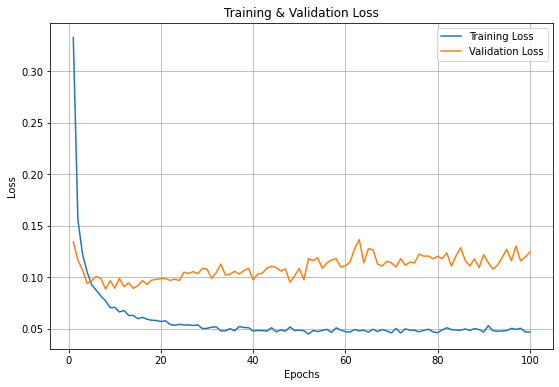

313/313 [==============================] - 1s 3ms/step - loss: 0.1165 - accuracy: 0.9841
Loss = 0.11649
Accuracy = 0.98410


In [31]:
# 5. L2 Regularization + Dropout

######## 변경부분 ########

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation = 'softmax'))

######## 변경부분 ########

# compile
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# fitting

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

# visualization

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# result check
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 0.1897 - accuracy: 0.9464 - val_loss: 0.1241 - val_accuracy: 0.9663
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0834 - accuracy: 0.9763 - val_loss: 0.1040 - val_accuracy: 0.9710
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0580 - accuracy: 0.9849 - val_loss: 0.0848 - val_accuracy: 0.9784
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0423 - accuracy: 0.9898 - val_loss: 0.1051 - val_accuracy: 0.9753
Epoch 5/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0358 - accuracy: 0.9921 - val_loss: 0.1147 - val_accuracy: 0.9730
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0313 - accuracy: 0.9935 - val_loss: 0.1046 - val_accuracy: 0.9758
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0285 - accuracy: 0.9945 - val_loss: 0.1071 - val_accuracy: 0.9772

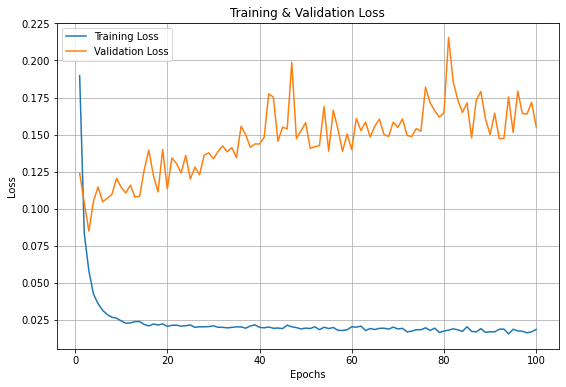

313/313 [==============================] - 1s 3ms/step - loss: 0.1373 - accuracy: 0.9816
Loss = 0.13725
Accuracy = 0.98160


In [32]:
# 6. L2 Regularization + Batch Normalization

######## 변경부분 ########

mnist = models.Sequential()
mnist.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256,
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

######## 변경부분 ########

# compile
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# fitting

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

# visualization

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# result check
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 0.2823 - accuracy: 0.9138 - val_loss: 0.1466 - val_accuracy: 0.9556
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1442 - accuracy: 0.9558 - val_loss: 0.1073 - val_accuracy: 0.9681
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1122 - accuracy: 0.9655 - val_loss: 0.0907 - val_accuracy: 0.9747
Epoch 4/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0941 - accuracy: 0.9707 - val_loss: 0.0858 - val_accuracy: 0.9758
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0805 - accuracy: 0.9753 - val_loss: 0.0833 - val_accuracy: 0.9786
Epoch 6/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0753 - accuracy: 0.9764 - val_loss: 0.0860 - val_accuracy: 0.9770
Epoch 7/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0680 - accuracy: 0.9786 - val_loss: 0.0752 - val_accuracy: 0.9803

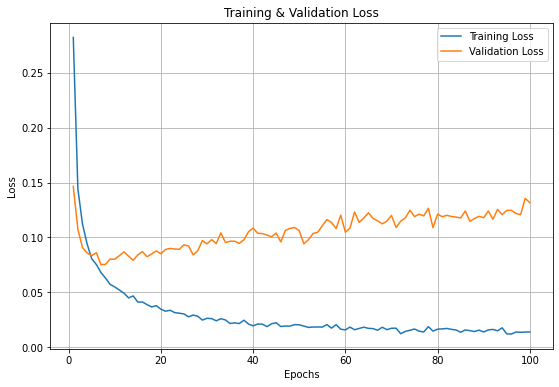

313/313 [==============================] - 1s 3ms/step - loss: 0.1049 - accuracy: 0.9857
Loss = 0.10491
Accuracy = 0.98570


In [33]:
# 7. Dropout + Batch Normalization

######## 변경부분 ########

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation = 'softmax'))

######## 변경부분 ########

# compile
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# fitting

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

# visualization

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# result check
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 0.2878 - accuracy: 0.9150 - val_loss: 0.1347 - val_accuracy: 0.9628
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1505 - accuracy: 0.9566 - val_loss: 0.1167 - val_accuracy: 0.9678
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1232 - accuracy: 0.9656 - val_loss: 0.1017 - val_accuracy: 0.9728
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1057 - accuracy: 0.9709 - val_loss: 0.0974 - val_accuracy: 0.9758
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0969 - accuracy: 0.9737 - val_loss: 0.0879 - val_accuracy: 0.9779
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0876 - accuracy: 0.9767 - val_loss: 0.0935 - val_accuracy: 0.9778
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0846 - accuracy: 0.9782 - val_loss: 0.0955 - val_accuracy: 0.9791

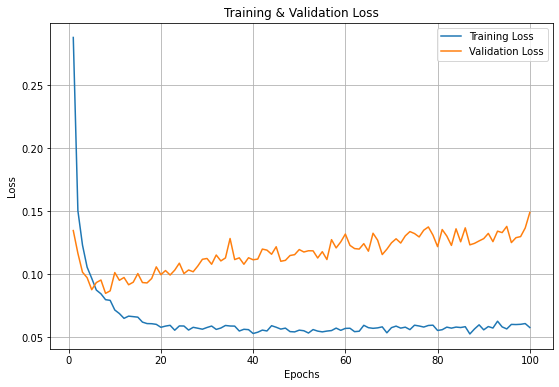

313/313 [==============================] - 1s 3ms/step - loss: 0.1223 - accuracy: 0.9855
Loss = 0.12233
Accuracy = 0.98550


In [34]:
# 8. L2 Regularization + Dropout + Batch Normalization

######## 변경부분 ########

mnist = models.Sequential()
mnist.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256,
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation = 'softmax'))

######## 변경부분 ########

# compile
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# fitting

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

# visualization

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

# result check
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))